# Tinyflux: Example with fictious temperature measurements

## Import Python Libraries und Settings

Die drei Queries (TimeQuery(), TagQuery(), FieldQuery()), helfen dabei, gezielt Daten aus der TinyFlux-Datenbank zu filtern. Sie ermöglichen das Filtern der Daten anhand von Zeit, Tags, und Feldwerten (Fields). 

1. **TimeQuery() (im Code als time abgekürzt)**:

    Diese Query ermöglicht es dir, nach Daten zu suchen, die anhand eines Zeitstempels gefiltert werden. Das ist nützlich, wenn du Daten nach einem bestimmten Zeitraum, einem exakten Zeitpunkt oder einer Zeitspanne abfragen möchtest.
    Beispiel im Code: ```python time_query_conditions = (time >= datetime(2024, 1, 1, 0, 0, 0, tzinfo=timezone.utc)) ```
    Hier wird eine Abfrage erstellt, die alle Datenpunkte zurückgibt, deren Zeitstempel nach dem 1. Januar 2024 liegt.

2. **TagQuery() (im Code als tags abgekürzt)**:

    Diese Query filtert Daten anhand von Tags, die zusätzliche Informationen über einen Datenpunkt enthalten. In deinem Beispiel sind sensor_id und status Tags. Tags enthalten in der Regel Metadaten, die nicht numerisch sind (z.B. die ID eines Sensors, der Status einer Messung, etc.).
    Beispiel im Code: ```python tag_query_conditions = (tags.status == "operational")```

    Diese Abfrage filtert die Datenpunkte, die den Tag status haben und den Wert "operational" aufweisen.

3. **FieldQuery() (im Code als field abgekürzt):**

    Diese Query filtert Daten anhand der Feldwerte (Fields) eines Datenpunkts. Feldwerte sind in der Regel numerische Daten, wie zum Beispiel Temperaturmessungen, die du in deinem Beispiel hast.
    Beispiel im Code: ```pythonfield_query_conditions = (field.temperature > 0.0)```
    Diese Abfrage filtert die Datenpunkte, deren temperature-Wert größer als 0 Grad ist.

Du kannst sie auch kombinieren, um komplexere Abfragen zu erstellen.
```python
time_query_conditions = (time < datetime(2023, 3, 31, 0, 0, 0, tzinfo=timezone.utc))
tag_query_conditions = (tags.status == "operational")
field_query_conditions = (field.temperature > 20.0)

my_results = db.search(time_query_conditions & tag_query_conditions & field_query_conditions)
```
Diese Abfrage sucht alle Datenpunkte, die vor dem 31. März 2023 gemessen wurden, den Status "operational" haben und eine Temperatur über 20 Grad aufweisen.

In [30]:
# Libraries
import pandas as pd
import csv
from tinyflux import TinyFlux, Point, FieldQuery, TagQuery, TimeQuery
from datetime import datetime, timezone, timedelta

# Settings
import warnings
warnings.filterwarnings("ignore")

# Abkürzungen für Query-Typen (kann man bennenen wie man will)
time = TimeQuery()
tags = TagQuery()
field = FieldQuery()

## Load function for creating a dataframe from query results into memory

Diese Funktion nimmt eine Liste von Point-Objekten aus der TinyFlux-Datenbank, extrahiert die relevanten Informationen (Zeit, Sensor-ID, Temperatur, Status), und wandelt diese Daten in einen Pandas DataFrame um, der für weitere Analysen verwendet werden kann. => *Man übersetzt die Querie Resultate in einen Data Frame*

In [31]:
# Define the function to transform the list of Point objects into a DataFrame
def points_to_dataframe(points_list):
    # Leere Liste, um die extrahierten Daten aus den Point-Objekten aufzunehmen
    data = []
    
    # Extract the relevant information
    for point in points_list:
        data.append({
            "time": point.time,  # Greift auf das time-Attribut zu
            "sensor_id": point.tags['sensor_id'],  # Greift auf die sensor_id im tags-Dictionary zu
            "temperature": point.fields['temperature'],  # Greift auf den temperature-Wert im fields-Dictionary zu
            "status": point.tags['status']  # Greift auf den status im tags-Dictionary zu
        })

    # Create a Pandas (pd) DataFrame
    df = pd.DataFrame(data)

    # Konvertiere die Zeitspalte in ein datetime-Format
    df['time'] = pd.to_datetime(df['time'])

    return df

## Initialize the TinyFlux database

In dieser Zeile wird eine TinyFlux-Datenbank mit dem Namen "temperatures.db" erstellt (oder geöffnet, falls sie bereits existiert).

In [32]:
# Erstellung der Tinyflux-Datenbank (wird bereitgestellt)
db = TinyFlux("temperatures.db")

## Importing a CSV file and show first descriptive statistics

Nach dem Erstellen liest man das CSV file in den Data Frame ein.<br>

Das heiss: Im zweiten Schritt lädst du eine CSV-Datei mit synthetischen Temperaturmessungen in einen Pandas DataFrame und konvertierst die Zeitstempel in das richtige Format, um die Daten für weitere Analysen vorzubereiten. Schließlich zeigst du die ersten 10 Einträge der Daten an, um einen ersten Überblick zu bekommen.

In [33]:
# CSV-Datei in Dataframe laden
df = pd.read_csv('example_data/synthetic_temperature_readings.csv')

# Das Format des Zeitstempels in Pandas setzen
df['time']= pd.to_datetime(df['time'], format='mixed')

# Erste 10 Records des Dataframes anzeigen
df.head(10)

,time,sensor_id,temperature,status
0,2023-01-01 00:00:00,52,20.377761,operational
1,2023-01-01 08:44:41,93,2.217658,maintenance
2,2023-01-01 17:29:22,15,14.912385,offline
3,2023-01-02 02:14:03,72,6.517424,operational
4,2023-01-02 10:58:44,61,36.684591,operational
5,2023-01-02 19:43:25,21,-9.623282,operational
6,2023-01-03 04:28:06,83,1.266640,operational
7,2023-01-03 13:12:47,87,8.267841,operational
8,2023-01-03 21:57:28,75,14.390490,operational
9,2023-01-04 06:42:09,75,32.540876,operational


In [34]:
# Erste 10 Records des Dataframes anzeigen
df.head(10)

,time,sensor_id,temperature,status
0,2023-01-01 00:00:00,52,20.377761,operational
1,2023-01-01 08:44:41,93,2.217658,maintenance
2,2023-01-01 17:29:22,15,14.912385,offline
3,2023-01-02 02:14:03,72,6.517424,operational
4,2023-01-02 10:58:44,61,36.684591,operational
5,2023-01-02 19:43:25,21,-9.623282,operational
6,2023-01-03 04:28:06,83,1.266640,operational
7,2023-01-03 13:12:47,87,8.267841,operational
8,2023-01-03 21:57:28,75,14.390490,operational
9,2023-01-04 06:42:09,75,32.540876,operational


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         1000 non-null   datetime64[ns]
 1   sensor_id    1000 non-null   int64         
 2   temperature  1000 non-null   float64       
 3   status       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 31.4+ KB


In [36]:
# Deskriptive Statistiken des Dataframes => Include all, weil man die kategorialen daten auch anzeigen will
df.describe(include='all')

,time,sensor_id,temperature,status
count,1000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,operational
freq,NaN,NaN,NaN,858
mean,2023-07-01 23:59:59.513999872,49.560000,15.392825,NaN
min,2023-01-01 00:00:00,1.000000,-9.988124,NaN
25%,2023-04-01 23:59:59.750000128,24.000000,2.945454,NaN
50%,2023-07-01 23:59:59.500000,50.000000,16.125006,NaN
75%,2023-09-30 23:59:59.249999872,75.000000,27.474836,NaN
max,2023-12-31 00:00:00,99.000000,39.967675,NaN


## Writing a CSV file into Tinyflux

Nun hat man die ersten Anhaltspunkte über den Datensatz
Wir lesen nun das CSV File in die Tinyflux DB <br>

1. Die CSV-Datei  wird im Lese-Modus (mode="r") geöffnet. Das with open()-Statement sorgt dafür, dass die Datei nach dem Lesen automatisch geschlossen wird, auch wenn ein Fehler auftritt.

2. Mit csv.DictReader(file) wird ein CSV-Leser erstellt.

3. Eine for-Schleife durchläuft jede Zeile der CSV-Datei, wobei jede Zeile durch das Dictionary row repräsentiert wird.

4. Mit dem *point = Point*-TEil  wird ein Point-Objekt für TinyFlux erstellt, das die Daten aus der aktuellen Zeile der CSV-Datei enthält. Das Point-Objekt speichert die Informationen als Zeitstempel, Messwerte (Fields) und zusätzliche Informationen (Tags). 
    - **time:** Der Zeitstempel wird aus der Spalte "time" extrahiert und in ein datetime-Objekt umgewandelt. Hier wird das Format der Zeit als *"%Y-%m-%d %H:%M:%S"*(Jahr-Monat-Tag Stunde:Minute) spezifiziert.

    - **measurement:** Der Messungstyp wird als *"blockchain_transactions"* festgelegt, was in diesem Fall ein Platzhalter für den Typ der Messung ist (du könntest es nach Belieben ändern).

    - **fields:** Hier werden numerische Werte gespeichert, in diesem Fall der Temperaturwert, der aus der Spalte *"temperature"* extrahiert und in eine Gleitkommazahl (float) umgewandelt wird.

    - **tags:** In den Tags werden zusätzliche Informationen gespeichert, die keine numerischen Werte sind, wie z. B. die *"sensor_id"* und der *"status"* des Sensors. Diese werden direkt aus den entsprechenden Spalten extrahiert.
    <br>
    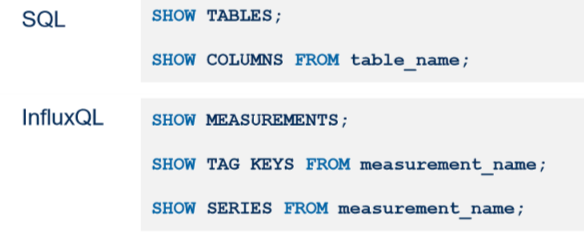

In [37]:
# Read CSV and insert data into TinyFlux
with open("example_data/synthetic_temperature_readings.csv", mode="r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        point = Point(
            time=datetime.strptime(row["time"], "%Y-%m-%d %H:%M:%S"), #hier muss man den eigentlichen Zeitstempel zuweisen
            measurement="blockchain_transactions", #kann man beliebig benennen, beschreibt gemessene Daten => Tabellenname
            fields={
                "temperature": float(row["temperature"])
                },  # Only numeric fields
            tags={
                "sensor_id": row["sensor_id"],
                "status": row["status"]  # Nicht-numerische Felder kommen in die Tags
            }
        )
        # der erstellte Datenpunkt (point) wird in die TinyFlux-Datenbank eingefügt
        db.insert(point)

## Writing manually into Tinyflux

In [38]:
# Create manual records
# neues Point-Objekt (p1) erstellen, das eine einzelne Messung in TinyFlux repräsentiert
p1 = Point(
    # # Zeitpunkt dieser Messung wird explizit auf den 1. Januar 2024 um 00:00:00 Uhr UTC (koordinierte Weltzeit) gesetzt
    time=datetime(2024, 1, 1, 0, 0, 0, tzinfo=timezone.utc), 
    # Sensor_id: Der Sensor mit der ID "20" hat diese Messung gemacht.
    # status: Der Status des Sensors wird als "operational" (betriebsbereit) angegeben.
    tags={"sensor_id": "20", "status": "operational"}, # Diese Metadaten beschreiben zusätzliche Informationen zur Messung
    # Fields: Hier wird der gemessene Wert gespeichert. 
    # In diesem Fall handelt es sich um eine Temperaturmessung mit einem Wert von 15.240971 Grad
    fields={"temperature": 15.240971}
)

p2 = Point(
    time=datetime(2024, 1, 1, 0, 0, 0, tzinfo=timezone.utc),
    tags={"sensor_id": "30", "status": "maintenance"},
    fields={"temperature": 20.517200}
)

# Insert into the DB.
db.insert_multiple([p1, p2])

2

## Querying by Time

In [39]:
# Definieren der Query
time_query_conditions = (time >= datetime(2024, 1, 1, 0, 0, 0, tzinfo=timezone.utc)) # Granularitätsstufe muss stimmen

# Datenabfrage mittels der definierten Query
my_results = db.search(time_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_time = points_to_dataframe(my_results)
df_result_time

,time,sensor_id,temperature,status
0,2024-01-01 00:00:00+00:00,20,15.240971,operational
1,2024-01-01 00:00:00+00:00,30,20.517200,maintenance
2,2024-01-01 00:00:00+00:00,20,15.240971,operational
3,2024-01-01 00:00:00+00:00,30,20.517200,maintenance
4,2024-01-01 00:00:00+00:00,20,15.240971,operational
5,2024-01-01 00:00:00+00:00,30,20.517200,maintenance
6,2024-01-01 00:00:00+00:00,20,15.240971,operational
7,2024-01-01 00:00:00+00:00,30,20.517200,maintenance
8,2024-01-01 00:00:00+00:00,20,15.240971,operational
9,2024-01-01 00:00:00+00:00,30,20.517200,maintenance


In [40]:
df_result_time.describe(include='all')

,time,sensor_id,temperature,status
count,12,12,12.000000,12
unique,NaN,2,NaN,2
top,NaN,20,NaN,operational
freq,NaN,6,NaN,6
mean,2024-01-01 00:00:00+00:00,NaN,17.879085,NaN
min,2024-01-01 00:00:00+00:00,NaN,15.240971,NaN
25%,2024-01-01 00:00:00+00:00,NaN,15.240971,NaN
50%,2024-01-01 00:00:00+00:00,NaN,17.879085,NaN
75%,2024-01-01 00:00:00+00:00,NaN,20.517200,NaN
max,2024-01-01 00:00:00+00:00,NaN,20.517200,NaN


## Querying by Tag

In [41]:
df.status.unique()

array(['operational', 'maintenance', 'offline'], dtype=object)

In [42]:
# Definieren der Queries
tag_query_conditions_operational = (tags.status == "operational")
tag_query_conditions_maintenance = (tags.status == "maintenance")
tag_query_conditions_offline = (tags.status == "offline")

# Datenabfrage mittels der definierten Queries
my_results_operational = db.search(tag_query_conditions_operational)
my_results_maintenance = db.search(tag_query_conditions_maintenance)
my_results_offline = db.search(tag_query_conditions_offline)

# Erstellung eines Dataframes aus den Query-Resultaten
df_result_tag_operational = points_to_dataframe(my_results_operational)
df_result_tag_maintenance = points_to_dataframe(my_results_maintenance)
df_result_tag_offline = points_to_dataframe(my_results_offline)

### Dataframe with operational status

In [43]:
df_result_tag_operational.head(2)

,time,sensor_id,temperature,status
0,2023-01-01 00:00:00+00:00,52,20.377761,operational
1,2023-01-01 00:00:00+00:00,52,20.377761,operational


In [44]:
df_result_tag_operational.describe(include='all')

,time,sensor_id,temperature,status
count,5154,5154,5154.000000,5154
unique,NaN,99,NaN,1
top,NaN,92,NaN,operational
freq,NaN,108,NaN,5154
mean,2023-07-01 01:43:41.511059456+00:00,NaN,15.635000,NaN
min,2023-01-01 00:00:00+00:00,NaN,-9.988124,NaN
25%,2023-04-01 08:41:48+00:00,NaN,3.584349,NaN
50%,2023-07-01 02:08:17+00:00,NaN,16.513257,NaN
75%,2023-09-30 04:19:27+00:00,NaN,27.662311,NaN
max,2024-01-01 00:00:00+00:00,NaN,39.967675,NaN


### Dataframe with maintenance status

In [45]:
df_result_tag_maintenance.head(2)

,time,sensor_id,temperature,status
0,2023-01-01 08:44:41+00:00,93,2.217658,maintenance
1,2023-01-01 08:44:41+00:00,93,2.217658,maintenance


In [46]:
df_result_tag_maintenance.describe(include='all')

,time,sensor_id,temperature,status
count,540,540,540.000000,540
unique,NaN,64,NaN,1
top,NaN,48,NaN,maintenance
freq,NaN,18,NaN,540
mean,2023-07-09 15:48:32.411110912+00:00,NaN,13.510619,NaN
min,2023-01-01 08:44:41+00:00,NaN,-9.745893,NaN
25%,2023-04-22 11:53:30+00:00,NaN,2.217658,NaN
50%,2023-07-04 17:35:07.500000+00:00,NaN,12.917043,NaN
75%,2023-10-11 11:24:41+00:00,NaN,26.892788,NaN
max,2024-01-01 00:00:00+00:00,NaN,39.606666,NaN


### Dataframe with offline status

In [47]:
df_result_tag_offline.head(2)

,time,sensor_id,temperature,status
0,2023-01-01 17:29:22+00:00,15,14.912385,offline
1,2023-01-01 17:29:22+00:00,15,14.912385,offline


In [48]:
df_result_tag_maintenance.describe(include='all')

,time,sensor_id,temperature,status
count,540,540,540.000000,540
unique,NaN,64,NaN,1
top,NaN,48,NaN,maintenance
freq,NaN,18,NaN,540
mean,2023-07-09 15:48:32.411110912+00:00,NaN,13.510619,NaN
min,2023-01-01 08:44:41+00:00,NaN,-9.745893,NaN
25%,2023-04-22 11:53:30+00:00,NaN,2.217658,NaN
50%,2023-07-04 17:35:07.500000+00:00,NaN,12.917043,NaN
75%,2023-10-11 11:24:41+00:00,NaN,26.892788,NaN
max,2024-01-01 00:00:00+00:00,NaN,39.606666,NaN


## Querying by Field

In [49]:
# Definieren der Queries
field_query_conditions = (field.temperature > 0)

# Datenabfrage mittels der definierten Queries
my_results = db.search(field_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_field = points_to_dataframe(my_results)

print("\n Dataframe with temperature measurements > 0:")
df_result_field.head(2)


 Dataframe with temperature measurements > 0:


,time,sensor_id,temperature,status
0,2023-01-01 00:00:00+00:00,52,20.377761,operational
1,2023-01-01 00:00:00+00:00,52,20.377761,operational


In [50]:
df_result_field.describe(include='all')

,time,sensor_id,temperature,status
count,4860,4860,4860.000000,4860
unique,NaN,99,NaN,3
top,NaN,62,NaN,operational
freq,NaN,108,NaN,4176
mean,2023-07-01 14:49:42.817283840+00:00,NaN,20.258389,NaN
min,2023-01-01 00:00:00+00:00,NaN,0.017957,NaN
25%,2023-03-30 04:13:41+00:00,NaN,11.101803,NaN
50%,2023-07-01 02:08:17+00:00,NaN,19.900241,NaN
75%,2023-09-30 04:19:27+00:00,NaN,29.714472,NaN
max,2024-01-01 00:00:00+00:00,NaN,39.967675,NaN


## Variations of combining queries

### Querying by Time and Tag

In [51]:
# Querying all temperatures, that were measured before Mach 31 2023 with the status "operational"

# Definieren der Queries
time_query_conditions = (time < datetime(2023, 3, 31, 0, 0, 0, tzinfo=timezone.utc))
tag_query_conditions = (tags.status == "operational")

# Datenabfrage mittels der definierten Queries
my_results = db.search(time_query_conditions & tag_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_time_tag = points_to_dataframe(my_results)
df_result_time_tag.head(2)

,time,sensor_id,temperature,status
0,2023-01-01 00:00:00+00:00,52,20.377761,operational
1,2023-01-01 00:00:00+00:00,52,20.377761,operational


In [52]:
df_result_time_tag.describe(include='all')

,time,sensor_id,temperature,status
count,1266,1266,1266.000000,1266
unique,NaN,90,NaN,1
top,NaN,62,NaN,operational
freq,NaN,60,NaN,1266
mean,2023-02-14 07:37:33.862559232+00:00,NaN,16.409696,NaN
min,2023-01-01 00:00:00+00:00,NaN,-9.864455,NaN
25%,2023-01-23 05:25:45+00:00,NaN,5.573659,NaN
50%,2023-02-13 08:37:28+00:00,NaN,17.142466,NaN
75%,2023-03-09 01:01:58+00:00,NaN,28.388975,NaN
max,2023-03-30 21:43:03+00:00,NaN,39.884631,NaN


### Querying by Tag and Field

In [53]:
# Querying all temperatures higher than 20 degrees and with the status "maintenance"

# Definieren der Queries
tag_query_conditions = (tags.status == "maintenance")
field_query_conditions = (field.temperature > 20.0)

# Datenabfrage mittels der definierten Queries
my_results = db.search(tag_query_conditions & field_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_tag_field = points_to_dataframe(my_results)
df_result_tag_field.head(2)

,time,sensor_id,temperature,status
0,2023-01-09 00:23:03+00:00,21,38.753358,maintenance
1,2023-01-09 00:23:03+00:00,21,38.753358,maintenance


In [54]:
df_result_tag_field.describe(include='all')

,time,sensor_id,temperature,status
count,192,192,192.000000,192
unique,NaN,29,NaN,1
top,NaN,62,NaN,maintenance
freq,NaN,12,NaN,192
mean,2023-07-24 04:32:22.750000128+00:00,NaN,29.769590,NaN
min,2023-01-09 00:23:03+00:00,NaN,20.517200,NaN
25%,2023-05-03 10:14:02.500000+00:00,NaN,26.682858,NaN
50%,2023-08-10 04:03:35.500000+00:00,NaN,29.882287,NaN
75%,2023-10-20 20:35:18.249999872+00:00,NaN,33.438947,NaN
max,2024-01-01 00:00:00+00:00,NaN,39.606666,NaN


## Variations of queries with multiple AND and OR conditions

In [55]:
# Querying all measurements during winter months with temperatures below 0
# OR conditions are separated with "|" (not to be confused with "/", see example below)

# Definieren der Queries
time_query_conditions = (time <= datetime(2023, 2, 28, 0, 0, 0, tzinfo=timezone.utc)) | (time >= datetime(2023, 12, 1, tzinfo=timezone.utc))
field_query_conditions = (field.temperature < 0.0)

# Datenabfrage mittels der definierten Queries
my_results = db.search(time_query_conditions & field_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_time_field = points_to_dataframe(my_results)
df_result_time_field.head(2)

,time,sensor_id,temperature,status
0,2023-01-02 19:43:25+00:00,21,-9.623282,operational
1,2023-01-02 19:43:25+00:00,21,-9.623282,operational


In [56]:
df_result_time_field.describe(include='all')

,time,sensor_id,temperature,status
count,276,276,276.000000,276
unique,NaN,32,NaN,3
top,NaN,90,NaN,operational
freq,NaN,24,NaN,234
mean,2023-05-22 15:02:38.826086912+00:00,NaN,-5.301463,NaN
min,2023-01-02 19:43:25+00:00,NaN,-9.938166,NaN
25%,2023-01-19 22:43:36+00:00,NaN,-7.383056,NaN
50%,2023-02-20 19:53:30.500000+00:00,NaN,-5.457587,NaN
75%,2023-12-12 18:45:45+00:00,NaN,-3.044190,NaN
max,2023-12-28 10:47:12+00:00,NaN,-0.024654,NaN


In [57]:
# Querying all measurements during summer months with temperatures above 0
# AND conditions are separated with "&"

# Definieren der Queries
time_query_conditions = (time <= datetime(2023, 8, 31, 0, 0, 0, tzinfo=timezone.utc)) & (time >= datetime(2023, 6, 1, tzinfo=timezone.utc))
field_query_conditions = (field.temperature > 0.0)

# Datenabfrage mittels der definierten Queries
my_results = db.search(time_query_conditions & field_query_conditions)

# Erstellung eines Dataframes aus den Query-Resultaten
# Die ugehörige Funktion "points_to_dataframe()" wurde zu Beginn dieses Notebooks in den Arbeitsspeicher geladen
df_result_time_field_2 = points_to_dataframe(my_results)
df_result_time_field_2.head(2)

,time,sensor_id,temperature,status
0,2023-06-01 05:04:08+00:00,60,35.516955,operational
1,2023-06-01 05:04:08+00:00,60,35.516955,operational


In [58]:
df_result_time_field_2.describe(include='all')

,time,sensor_id,temperature,status
count,1176,1176,1176.000000,1176
unique,NaN,83,NaN,3
top,NaN,58,NaN,operational
freq,NaN,54,NaN,1002
mean,2023-07-17 08:04:56.025510144+00:00,NaN,21.887445,NaN
min,2023-06-01 05:04:08+00:00,NaN,0.017957,NaN
25%,2023-06-23 17:03:24.750000128+00:00,NaN,13.152994,NaN
50%,2023-07-18 09:30:48.500000+00:00,NaN,22.545341,NaN
75%,2023-08-09 21:30:05.249999872+00:00,NaN,32.156976,NaN
max,2023-08-30 22:30:37+00:00,NaN,39.816789,NaN
